## 作業
## 請計算出 106 與 107 年每個月 0 到 9歲國小(含)之前的人數總計

In [1]:
import numpy as np
a = np.genfromtxt('HW13__Data.csv',dtype='int',delimiter=',', skip_header=1,encoding='utf-8-sig')
a = a[a[:,0]<108]
for data in a:
      print(f'{data[0]} {data[1]}國小(含)之前的人數{data[3:5].sum()}')

106 1國小(含)之前的人數573
106 2國小(含)之前的人數569
106 3國小(含)之前的人數572
106 4國小(含)之前的人數560
106 5國小(含)之前的人數570
106 6國小(含)之前的人數577
106 7國小(含)之前的人數583
106 8國小(含)之前的人數584
106 9國小(含)之前的人數582
106 10國小(含)之前的人數584
106 11國小(含)之前的人數583
106 12國小(含)之前的人數583
107 1國小(含)之前的人數590
107 2國小(含)之前的人數593
107 3國小(含)之前的人數584
107 4國小(含)之前的人數571
107 5國小(含)之前的人數565
107 6國小(含)之前的人數567
107 7國小(含)之前的人數568
107 8國小(含)之前的人數562
107 9國小(含)之前的人數559
107 10國小(含)之前的人數558
107 11國小(含)之前的人數551
107 12國小(含)之前的人數546


## 丟棄遺失值
+ 您可以使用 dropna 方法再搭配 axis 參數方式進行搭配。
+ 默認情況下，預設為 axis = 0，也就是會沿著 Rows 進行，當發現到任何值為 NA 就會整個 Row 刪除。
+ 若加入參數 how=‘all’ 代表整個 Row 資料都是遺失值情況下才可以刪除丟棄。
+ 加入參數 thresh=N 代表刪除包含少於 N 個觀察值的 row。

In [2]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
drop=pd.read_csv(StringIO(csv_data))
print(drop)

print('沿著row進行刪除，只要有遺失值就刪除')
drop1=drop.dropna(axis=0)#只要一個Row是Nan就移除
print(drop1)
print('沿著column進行刪除，只要有遺失值就刪除')
drop2=drop.dropna(axis=1)#因為每一欄都有NaN所以沒資料
print(drop2)
drop3=drop.dropna(axis=0,how='all')# 所有都是Nan才移除
print(drop3)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
沿著row進行刪除，只要有遺失值就刪除
Empty DataFrame
Columns: [A, B, C, D, E]
Index: []
沿著column進行刪除，只要有遺失值就刪除
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN


In [3]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
drop=pd.read_csv(StringIO(csv_data))
print(drop)
print("==================================")
drop4=drop.dropna(thresh=3)#非缺失值(有數值的)<thresh移除
print(drop4)
print("==================================")
drop5=drop.dropna(subset=['C','D'])# c跟d欄位都不是NaN的顯示
print(drop5)
print("==================================")
drop.dropna(thresh=2,inplace=True)# inplace=True可修改drop 非缺失值<thresh移除
print(drop)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
      A    B     C    D   E
0   2.0  3.0   4.0  5.0 NaN
2  10.0  NaN  11.0  8.0 NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
4   3.0   NaN   3.0  NaN NaN


## 填充遺失值
+ 可使用 fillna 函數進行填充
  + 輸入要填充的數值
    + 補上中位數：建議補上中位數而非平均值，這樣相對來說不會受到極端值的影響。
    + 根據原本的資料分布補上亂數。
+ 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [5]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
fill=pd.read_csv(StringIO(csv_data))
print(fill)
fill_zero = fill.fillna(0)  #Nan都填上0
print(fill_zero)
print("-------2--------")
fill_zero = fill.fillna(0,limit=2) #只填上2各0
print(fill_zero)
print("-------3--------")
fill2=fill.ffill()# 如果當前欄位是NaN  向上一筆同欄直到非NaN的值 寫入目前欄位
print(fill2)
print("-------4--------")
fill3=fill.bfill()# 如果當前欄位是NaN  向下一筆同欄直到非NaN的值 寫入目前欄位
print(fill3)
print("---------------")


      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D    E
0   2.0   3.0   4.0  5.0  0.0
1   6.0  34.0   6.0  0.0  0.0
2  10.0   0.0  11.0  8.0  0.0
3   0.0   0.0   0.0  0.0  0.0
4   3.0   0.0   3.0  0.0  0.0
5   0.0   5.0   0.0  0.0  0.0
-------2--------
      A     B     C    D    E
0   2.0   3.0   4.0  5.0  0.0
1   6.0  34.0   6.0  0.0  0.0
2  10.0   0.0  11.0  8.0  NaN
3   0.0   0.0   0.0  0.0  NaN
4   3.0   NaN   3.0  NaN  NaN
5   0.0   5.0   0.0  NaN  NaN
-------3--------
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  5.0 NaN
2  10.0  34.0  11.0  8.0 NaN
3  10.0  34.0  11.0  8.0 NaN
4   3.0  34.0   3.0  8.0 NaN
5   3.0   5.0   3.0  8.0 NaN
-------4--------
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  8.0 NaN
2  10.0   5.0  11.0  8.0 NaN
3   3.0

In [21]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
fill=pd.read_csv(StringIO(csv_data))
print(fill)
fillmean1=fill.mean()
print(fillmean1)
print(type(fillmean1))

print("---------------")
for x in fill:
    col_to_fill = fill[x]
    col_to_fill.fillna(fillmean1.loc[x],inplace=True)#填上平均值
print("---------------")
print(fill)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
A     5.25
B    14.00
C     6.00
D     6.50
E      NaN
dtype: float64
<class 'pandas.core.series.Series'>
---------------
---------------
       A     B     C    D   E
0   2.00   3.0   4.0  5.0 NaN
1   6.00  34.0   6.0  6.5 NaN
2  10.00  14.0  11.0  8.0 NaN
3   5.25  14.0   6.0  6.5 NaN
4   3.00  14.0   3.0  6.5 NaN
5   5.25   5.0   6.0  6.5 NaN


### 檢查重複

In [22]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df2=pd.read_csv(StringIO(csv_data))
print(df2)
print("-------0---------")
print(df2.duplicated()) #因為index 2的row 5 5 5 與 index 1的row 5 5 5 一模一樣所以重複
print("-------1---------")
print(df2.duplicated('A'))# 單獨查A欄的數值是否重複
print("-------2---------")
print(df2.duplicated('D'))
print("-------3---------")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
-------0---------
0    False
1    False
2     True
3    False
dtype: bool
-------1---------
0    False
1    False
2     True
3    False
dtype: bool
-------2---------
0    False
1     True
2     True
3     True
dtype: bool
-------3---------


### 丟棄重複值的資料

In [23]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df2=pd.read_csv(StringIO(csv_data))
print(df2)
print("-------0---------")
print(df2.drop_duplicates(keep='last'))#保留最後一個重複的
print("-------1---------")
print(df2.drop_duplicates(keep=False))#不保留
print("-------2---------")
print(df2.drop_duplicates(subset=['C','D']))#因為C D 重頭到尾都重複 所以 只留index :0的資料
print("-------3---------")
print(df2.drop_duplicates(subset=['C','D'],keep='last'))#因為C D 重頭到尾都重複 keep 為 last 所以 只留index :3
print("-------4---------")
print(df2.drop_duplicates(subset=['C','D'],keep=False))#因為C D 重頭到尾都重複 keep 為 False都不留 所以空
print("-------5---------")
print(df2.drop_duplicates(subset=['A','D'],keep=False))
print("-------6---------")
print(df2.drop_duplicates(subset=['B']))#保留第一個

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
-------0---------
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
-------1---------
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
-------2---------
   A  B  C  D
0  2  3  5  5
-------3---------
    A   B  C  D
3  13  23  5  5
-------4---------
Empty DataFrame
Columns: [A, B, C, D]
Index: []
-------5---------
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
-------6---------
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5


## Pand群組

In [24]:
import pandas as pd
import numpy as np
company=["A","B","C"]
data1=pd.DataFrame(
{"company":[company[x] for x in np.random.randint(0,len(company),20)],
"salary":np.random.randint(5,50,20),
"age":np.random.randint(15,50,20)}    
)
print(data1)

   company  salary  age
0        A      48   39
1        C      36   45
2        A      24   27
3        A       9   32
4        B      24   39
5        C      15   38
6        A      34   15
7        A       5   32
8        A      39   18
9        B      18   26
10       A       7   48
11       A      35   35
12       A      46   29
13       B      42   22
14       A       8   17
15       C      34   29
16       A      43   17
17       C      27   22
18       A      31   47
19       C      25   34


In [25]:
group = data1.groupby("company")
print(list(group))

[('A',    company  salary  age
0        A      48   39
2        A      24   27
3        A       9   32
6        A      34   15
7        A       5   32
8        A      39   18
10       A       7   48
11       A      35   35
12       A      46   29
14       A       8   17
16       A      43   17
18       A      31   47), ('B',    company  salary  age
4        B      24   39
9        B      18   26
13       B      42   22), ('C',    company  salary  age
1        C      36   45
5        C      15   38
15       C      34   29
17       C      27   22
19       C      25   34)]


In [30]:
print(group.size())
print(group.first())
print(group.last())
print(group.sum())
print(group.max())
print(group.min())


company
A    12
B     3
C     5
dtype: int64
         salary  age
company             
A            48   39
B            24   39
C            36   45
         salary  age
company             
A            31   47
B            42   22
C            25   34
         salary  age
company             
A           329  356
B            84   87
C           137  168
         salary  age
company             
A            48   48
B            42   39
C            36   45
         salary  age
company             
A             5   15
B            18   22
C            15   22


In [36]:
import pandas as pd
fortune = pd.read_csv("fortune1000.csv",index_col='Rank',encoding="utf-8")
print(fortune)
print("="*100)
sectors = fortune.groupby("Sector")#部門
print(sectors.size())


                         Company                        Sector  \
Rank                                                             
1                        Walmart                     Retailing   
2                    Exxon Mobil                        Energy   
3                          Apple                    Technology   
4             Berkshire Hathaway                    Financials   
5                       McKesson                   Health Care   
...                          ...                           ...   
996   New York Community Bancorp                    Financials   
997    Portland General Electric                        Energy   
997    Portland General Electric                        Energy   
999                      Wendy’s  Hotels, Resturants & Leisure   
1000           Briggs & Stratton                   Industrials   

                                      Industry           Location  Revenue  \
Rank                                                           

In [40]:
print(type(sectors))
groupData = sectors.get_group("Energy")
print(type(groupData))
print(groupData.head())
print(groupData.max())
print(groupData.min())

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
                 Company  Sector            Industry         Location  \
Rank                                                                    
2            Exxon Mobil  Energy  Petroleum Refining       Irving, TX   
14               Chevron  Energy  Petroleum Refining    San Ramon, CA   
30           Phillips 66  Energy  Petroleum Refining      Houston, TX   
32         Valero Energy  Energy  Petroleum Refining  San Antonio, TX   
42    Marathon Petroleum  Energy  Petroleum Refining      Findlay, OH   

      Revenue  Profits  Employees  
Rank                               
2      246204    16150      75600  
14     131118     4587      61500  
30      87169     4227      14000  
32      81824     3990      10103  
42      64566     2852      45440  
Company                      Xcel Energy
Sector                            Energy
Industry     Utilities: Gas and Electric
Location            

In [42]:
sectors.sum(numeric_only = True)

,Revenue,Profits,Employees
Sector,,,
Aerospace & Defense,357940,28742,968057
Apparel,95968,8236,346397
Business Services,272195,28227,1361050
Chemicals,243897,22628,463651
Energy,1517809,-73447,1188927
Engineering & Construction,153983,5304,406708
Financials,2217159,260209,3359948
Food and Drug Stores,483769,16759,1395398
"Food, Beverages & Tobacco",555967,51417,1211632


In [44]:
sectors.mean(numeric_only = True)

,Revenue,Profits,Employees
Sector,,,
Aerospace & Defense,17897.000000,1437.100000,48402.850000
Apparel,6397.866667,549.066667,23093.133333
Business Services,5337.156863,553.470588,26687.254902
Chemicals,8129.900000,754.266667,15455.033333
Energy,12441.057377,-602.024590,9745.303279
Engineering & Construction,5922.423077,204.000000,15642.615385
Financials,15950.784173,1872.007194,24172.287770
Food and Drug Stores,32251.266667,1117.266667,93026.533333
"Food, Beverages & Tobacco",12929.465116,1195.744186,28177.488372


In [46]:
sectors.agg(["size","sum"])

Company  \
                                size   
Sector                                 
Aerospace & Defense               20   
Apparel                           15   
Business Services                 51   
Chemicals                         30   
Energy                           122   
Engineering & Construction        26   
Financials                       139   
Food and Drug Stores              15   
Food, Beverages & Tobacco         43   
Health Care                       75   
Hotels, Resturants & Leisure      25   
Household Products                28   
Industrials                       46   
Materials                         43   
Media                             25   
Motor Vehicles & Parts            24   
Retailing                         80   
Technology                       102   
Telecommunications                15   
Transportation                    36   
Wholesalers                       40   

                                                                                 \
                                                                            sum   
Sector                                                                            
Aerospace & Defense           BoeingUnited TechnologiesLockheed MartinGenera...   
Apparel                       NikeVFPVHRalph LaurenHanesbrandsLevi StraussCo...   
Business Services             ManpowerGroupOmnicom GroupAramarkVisaWaste Man...   
Chemicals                     Dow ChemicalDuPontPPG IndustriesMonsantoEcolab...   
Energy                        Exxon MobilChevronPhillips 66Valero EnergyMara...   
Engineering & Construction    FluorAECOMJacobs Engineering GroupD.R. HortonL...   
Financials                    Berkshire HathawayFannie MaeJ.P. Morgan ChaseB...   
Food and Drug Stores          CVS HealthKrogerWalgreens Boots AlliancePublix...   
Food, Beverages & Tobacco     Archer Daniels MidlandPepsiCoCoca-ColaTyson Fo...   
Health Care                   McKessonUnitedHealth GroupAmerisourceBergenCar...   
Hotels, Resturants & Leisure  McDonald’sStarbucksMarriott InternationalYum B...   
Household Products            Procter & GambleKimberly-ClarkColgate-Palmoliv...   
Industrials                   General ElectricCaterpillarHoneywell Internati...   
Materials                     AlcoaInternational PaperNucorUnited States Ste...   
Media                         DisneyTwenty-First Century FoxTime WarnerCBSVi...   
Motor Vehicles & Parts        General MotorsFord MotorJohnson ControlsPaccar...   
Retailing                     WalmartCostcoHome DepotTargetLowe’sBest BuyTJX...   
Technology                    AppleAmazon.comHPMicrosoftIBMAlphabetIntelCisc...   
Telecommunications            AT&TVerizonComcastTime Warner CableCenturyLink...   
Transportation                UPSFedExAmerican Airlines GroupDelta Air Lines...   
Wholesalers                   SyscoIngram MicroWorld Fuel ServicesAvnetTech ...   

                             Industry  \
                                 size   
Sector                                  
Aerospace & Defense                20   
Apparel                            15   
Business Services                  51   
Chemicals                          30   
Energy                            122   
Engineering & Construction         26   
Financials                        139   
Food and Drug Stores               15   
Food, Beverages & Tobacco          43   
Health Care                        75   
Hotels, Resturants & Leisure       25   
Household Products                 28   
Industrials                        46   
Materials                          43   
Media                              25   
Motor Vehicles & Parts             24   
Retailing                          80   
Technology                        102   
Telecommunications                 15   
Transportation                     36   
Wholesalers                        40   

                                                                                 \
       

In [63]:
meanData = sectors.agg("mean",numeric_only=True)
print(type(meanData))
meanData

<class 'pandas.core.frame.DataFrame'>


,Revenue,Profits,Employees
Sector,,,
Aerospace & Defense,17897.000000,1437.100000,48402.850000
Apparel,6397.866667,549.066667,23093.133333
Business Services,5337.156863,553.470588,26687.254902
Chemicals,8129.900000,754.266667,15455.033333
Energy,12441.057377,-602.024590,9745.303279
Engineering & Construction,5922.423077,204.000000,15642.615385
Financials,15950.784173,1872.007194,24172.287770
Food and Drug Stores,32251.266667,1117.266667,93026.533333
"Food, Beverages & Tobacco",12929.465116,1195.744186,28177.488372


In [66]:
meanData = sectors.agg({"Revenue":["sum","mean","size"],"Employees":["mean"]})
print(type(meanData))
meanData

<class 'pandas.core.frame.DataFrame'>


Revenue                        Employees
                                  sum          mean size          mean
Sector                                                                
Aerospace & Defense            357940  17897.000000   20  48402.850000
Apparel                         95968   6397.866667   15  23093.133333
Business Services              272195   5337.156863   51  26687.254902
Chemicals                      243897   8129.900000   30  15455.033333
Energy                        1517809  12441.057377  122   9745.303279
Engineering & Construction     153983   5922.423077   26  15642.615385
Financials                    2217159  15950.784173  139  24172.287770
Food and Drug Stores           483769  32251.266667   15  93026.533333
Food, Beverages & Tobacco      555967  12929.465116   43  28177.488372
Health Care                   1614707  21529.426667   75  35710.520000
Hotels, Resturants & Leisure   169546   6781.840000   25  99369.800000
Household Products             234737   8383.464286   28  23072.785714
Industrials                    497581  10816.978261   46  33591.934783
Materials                      259145   6026.627907   43  14840.069767
Media                          220764   8830.560000   25  22012.560000
Motor Vehicles & Parts         482540  20105.833333   24  45106.666667
Retailing                     1465076  18313.450000   80  77845.362500
Technology                    1377600  13505.882353  102  35087.735294
Telecommunications             461834  30788.933333   15  55497.866667
Transportation                 408508  11347.444444   36  42688.694444
Wholesalers                    444800  11120.000000   40  13139.925000

In [67]:
import pandas as pd
auto_price=pd.read_csv('Automobile.csv') #看一下Automobile.csv 哪些是?
print(auto_price.head())
print('了解欄位名稱，-容易有被誤判的風險')
print(auto_price.columns)
print('儲存欄位名稱')

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [69]:
print("是否有遺失值")
print(auto_price.isnull().any())
print(auto_price.isnull().sum())

是否有遺失值
symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
hei

In [77]:
print("查看類型")
print(auto_price.dtypes)

查看類型
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [76]:
list1 = []
for col in auto_price:
    for v in auto_price[col]:
        if v == "?":
            list1.append(col)
            break
print(list1)            

['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [83]:
for column in list1:
     auto_price.loc[auto_price[column] == "?", column] = np.NaN
print(auto_price.isnull().any())

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool


In [84]:
print(print(auto_price.isnull().sum()))

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
None


In [93]:
try:
    auto_price.drop(["normalized-losses"],axis=1,inplace=True)
except:
    pass
print(auto_price.isnull().sum())    

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


In [95]:
auto_price.dropna(axis=0,inplace=True)
print(auto_price.isnull().sum())

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [97]:
for i in auto_price.columns:
    if auto_price[i].dtype == object:
        try:
            auto_price[i] = auto_price[i].astype("float")
        except:
            pass
print(auto_price.dtypes)            
        

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [98]:
clos4 = []#字串類型
clos5 = []#數字類型
for i in auto_price.columns:
    if auto_price[i].dtype == object:
        clos4.append(i)
    else:
        clos5.append(i)
print("字串類型:",clos4)        
print("數字類型:",clos5)        

字串類型: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
數字類型: ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [99]:
for column in clos4:
    print(auto_price[column].value_counts())

make
toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: count, dtype: int64
fuel-type
gas       174
diesel     19
Name: count, dtype: int64
aspiration
std      158
turbo     35
Name: count, dtype: int64
num-of-doors
four    112
two      81
Name: count, dtype: int64
body-style
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64
drive-wheels
fwd    114
rwd     71
4wd      8
Name: count, dtype: int64
engine-location
front    190
rear       3
Name: count, dtype: int64
engine-type
ohc     141
ohcf     15
ohcv     13
dohc     12
l        12
Name: count, dtype: 

字串資料以長條圖顯示


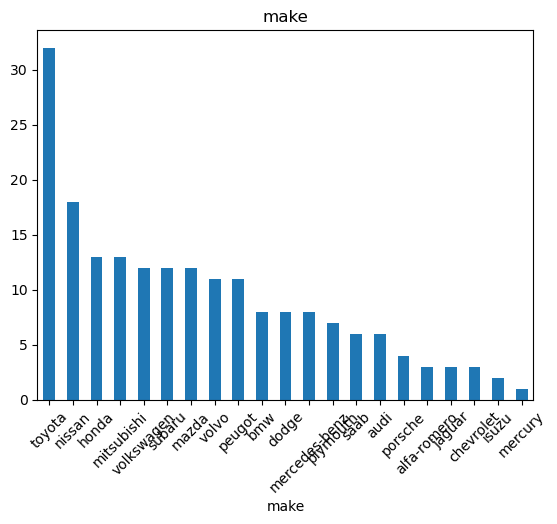

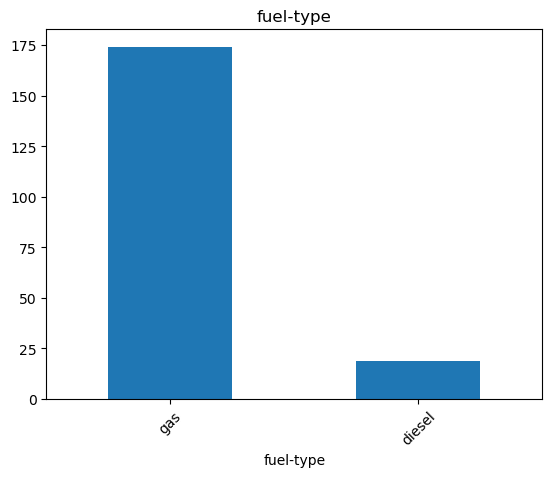

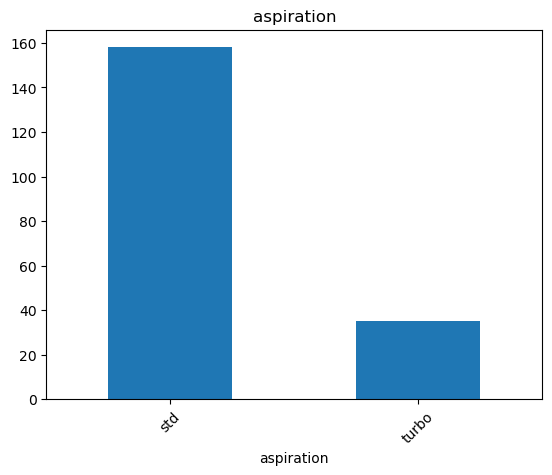

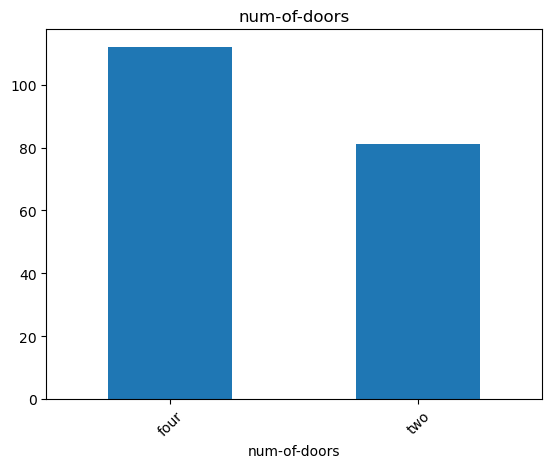

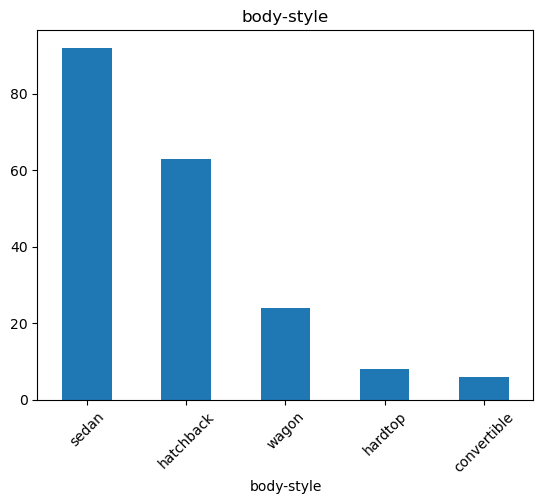

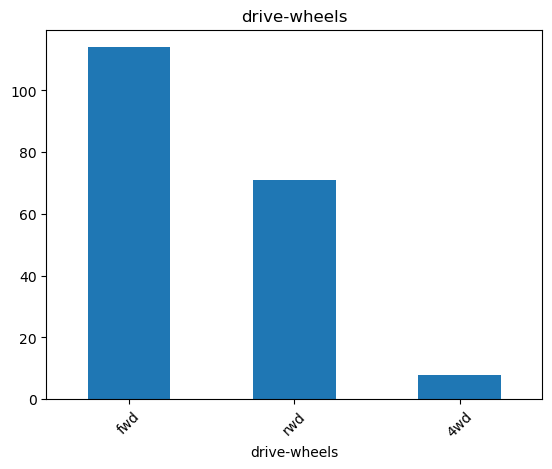

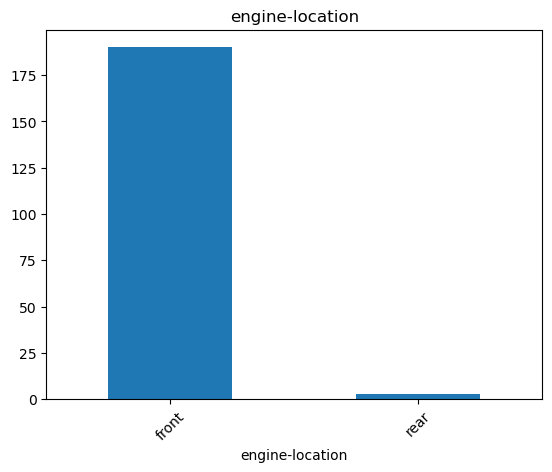

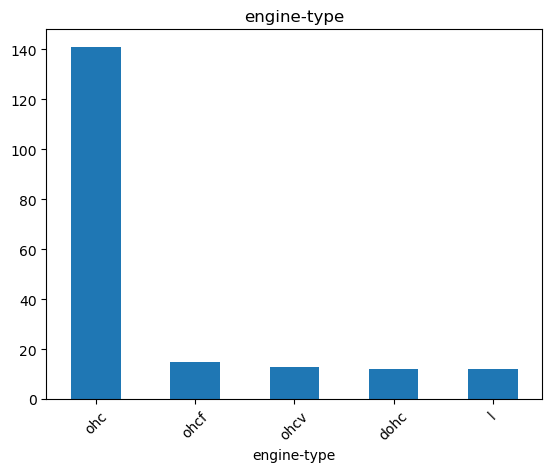

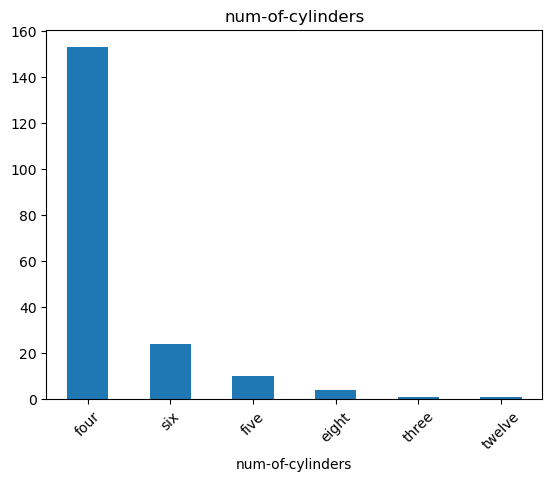

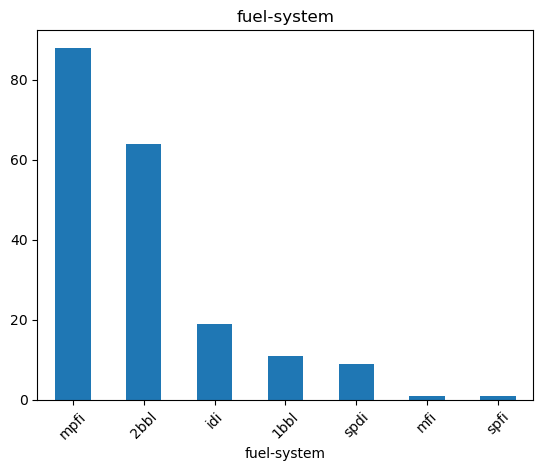

In [102]:
print('字串資料以長條圖顯示')
import matplotlib.pyplot as plt
for cols in clos4:
  auto_price[cols].value_counts( ).plot(
      kind='bar',title=cols,rot=45
  )
  plt.show( )

數值資料與price之間關係，以散佈圖顯示


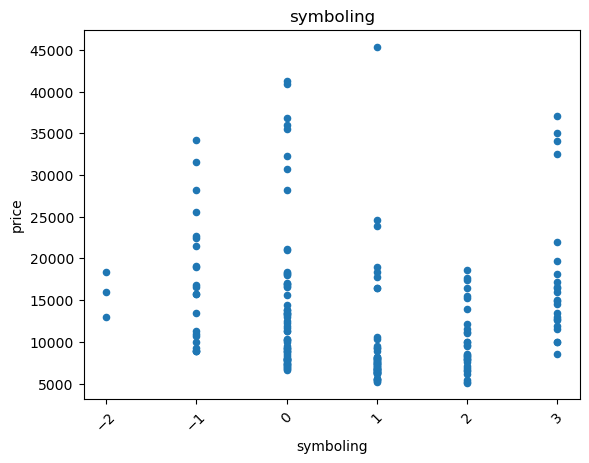

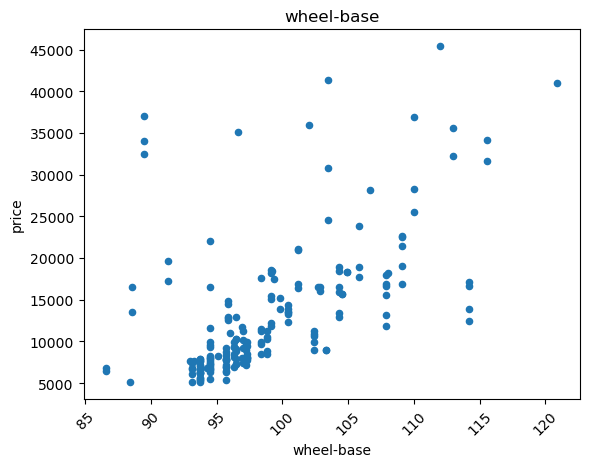

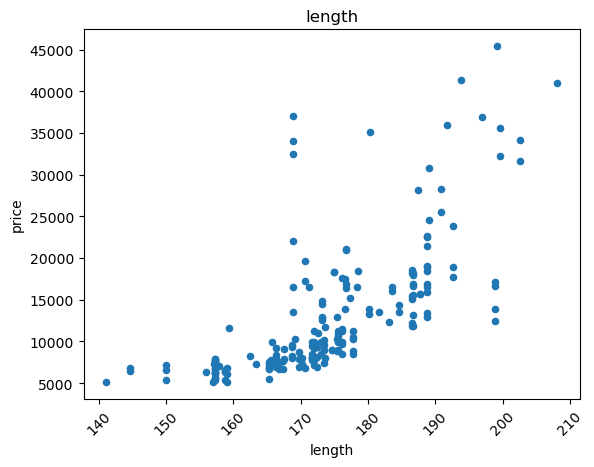

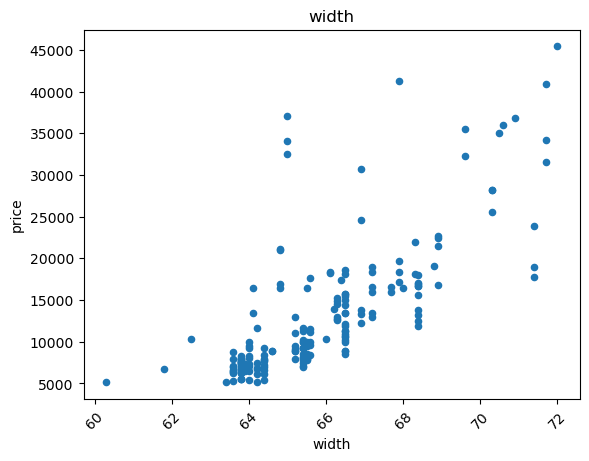

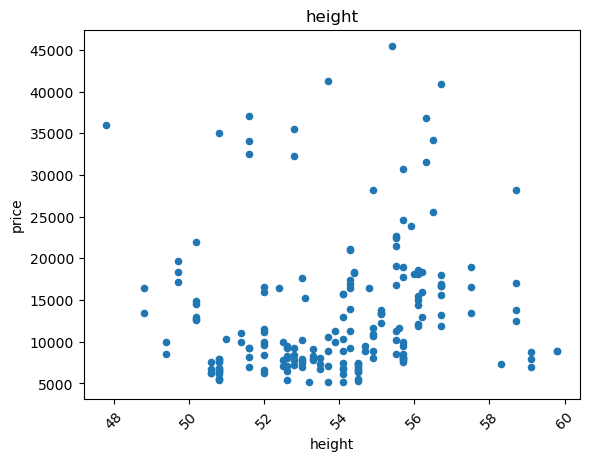

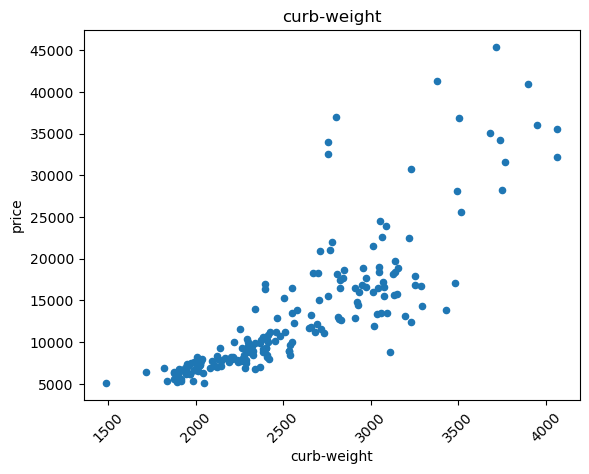

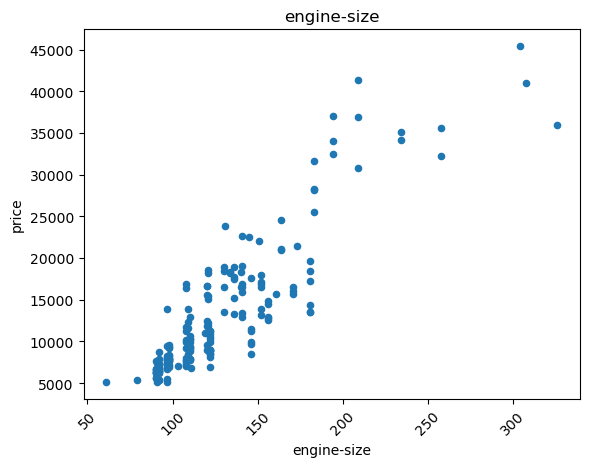

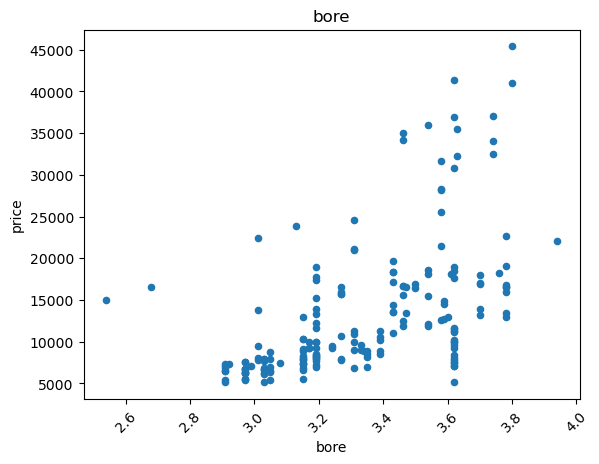

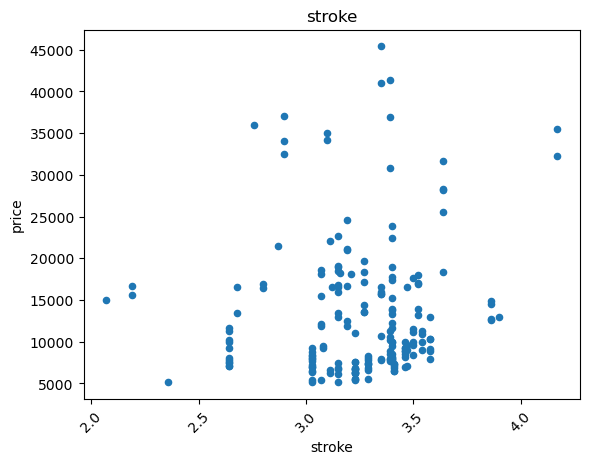

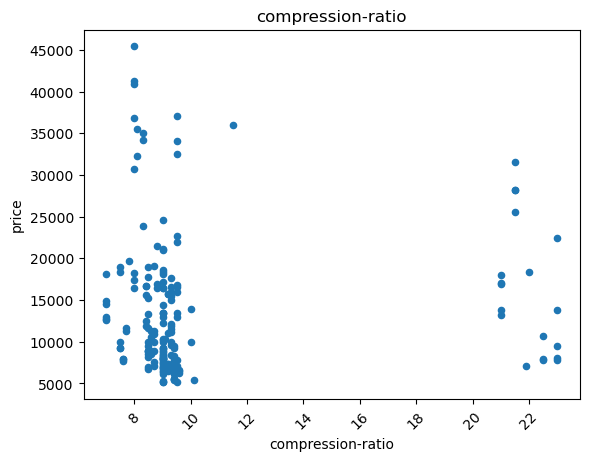

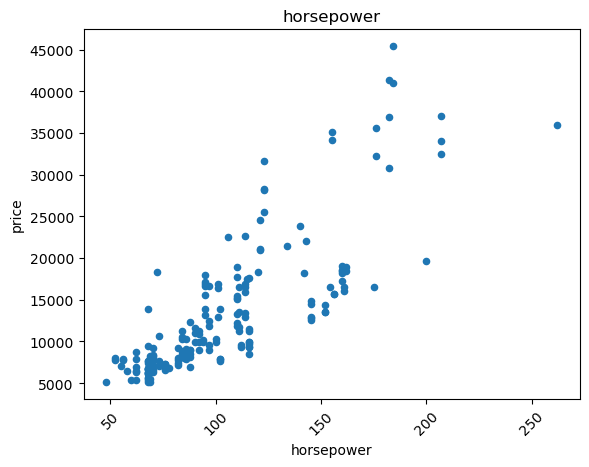

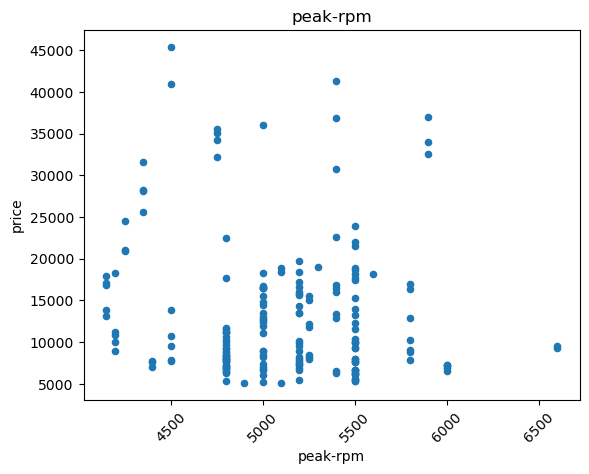

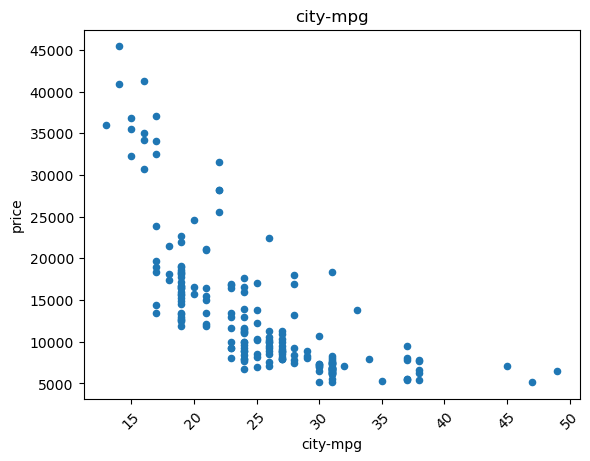

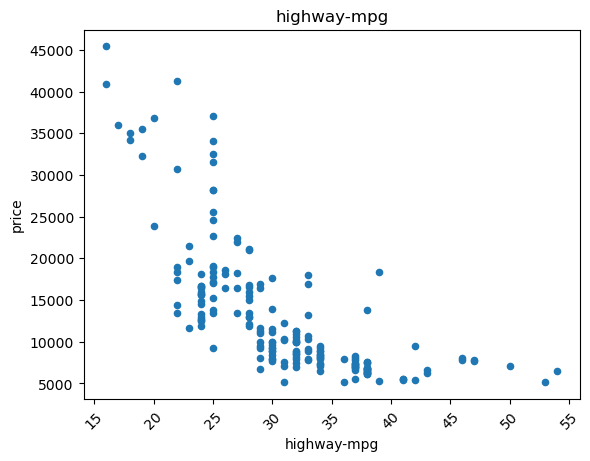

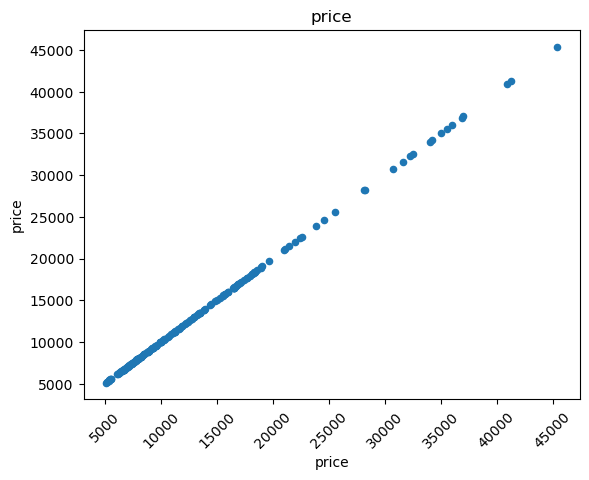

In [103]:
print('數值資料與price之間關係，以散佈圖顯示')
for cols in clos5:
  auto_price.plot(
      kind='scatter',
      title=cols,x=cols,y='price',rot=45
  )
  plt.show( )

數值資料以直方圖顯示


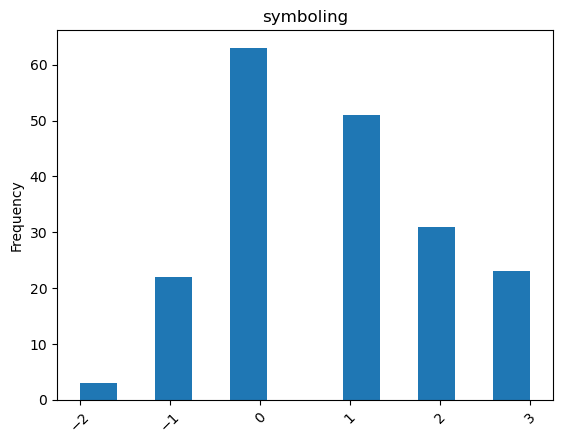

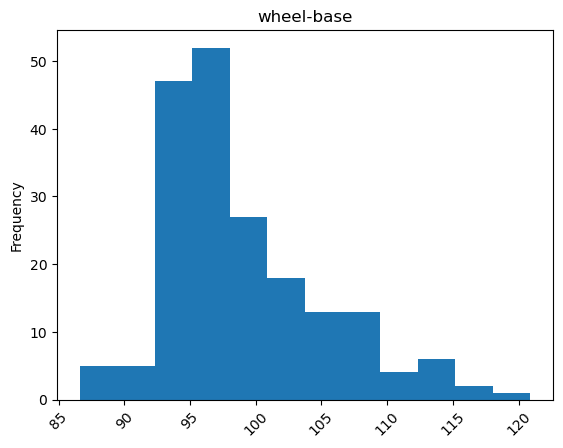

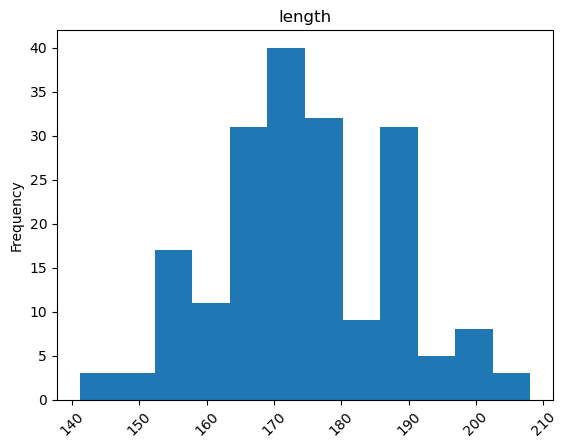

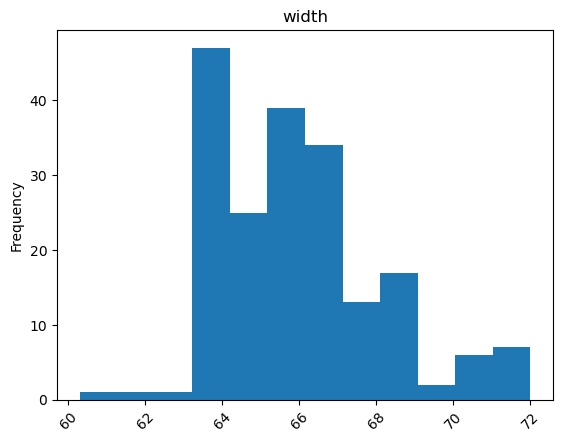

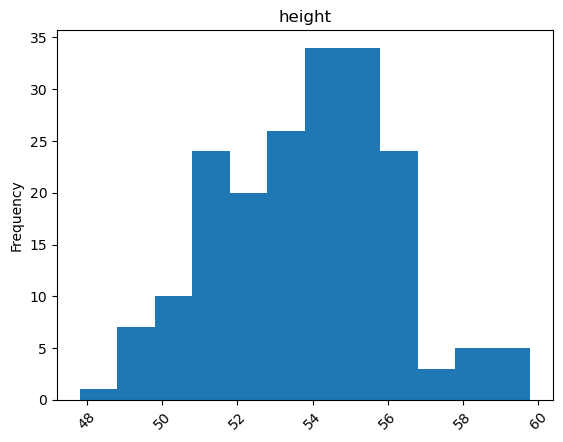

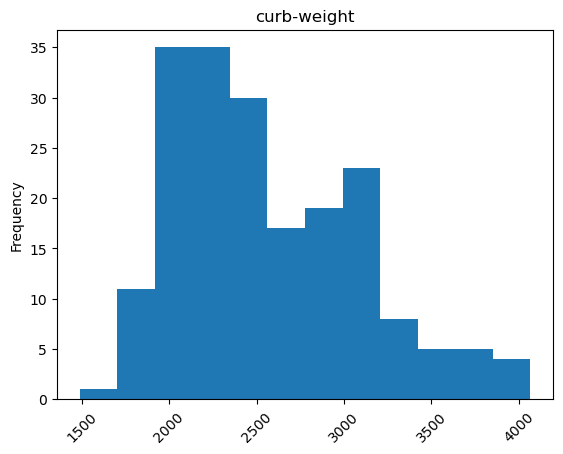

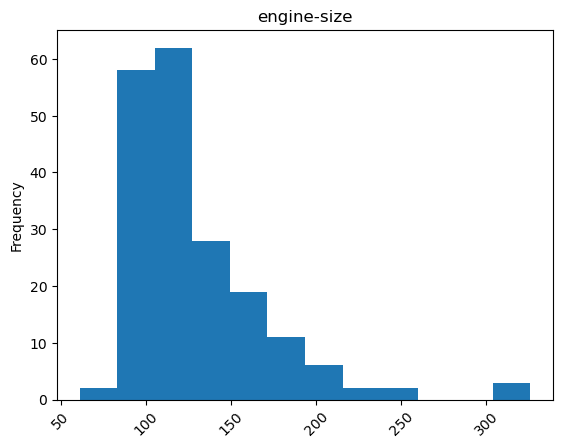

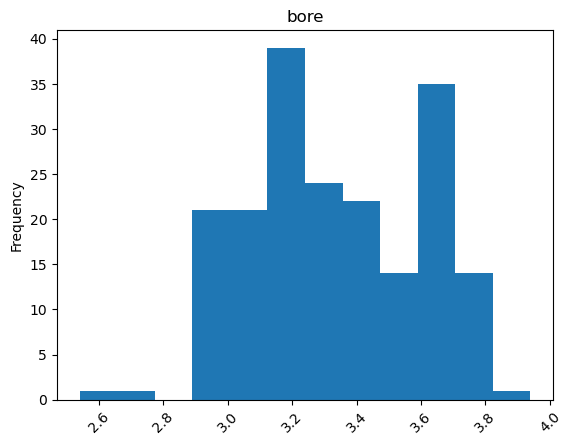

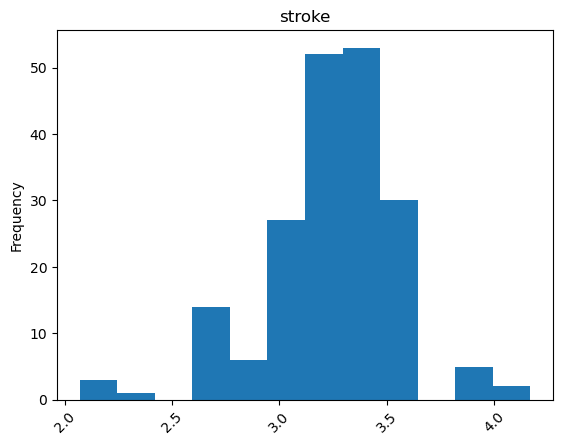

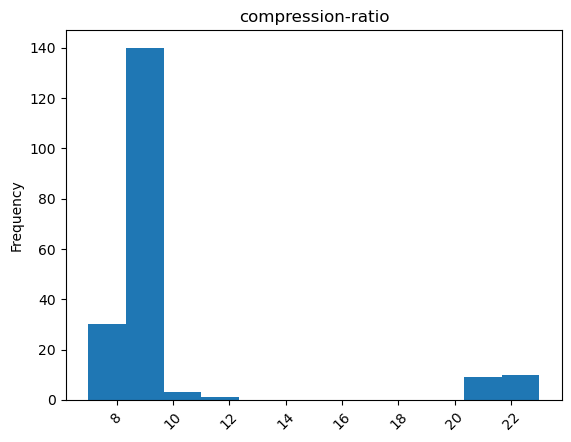

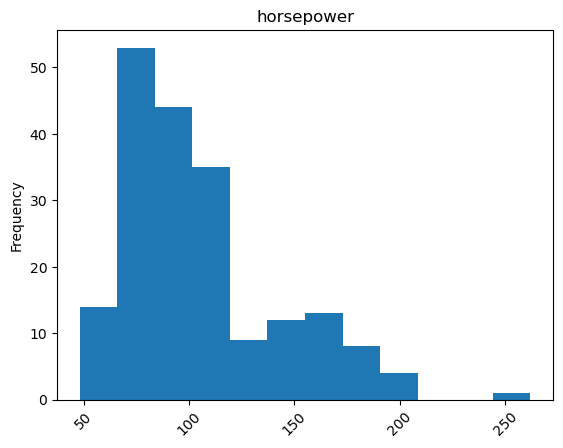

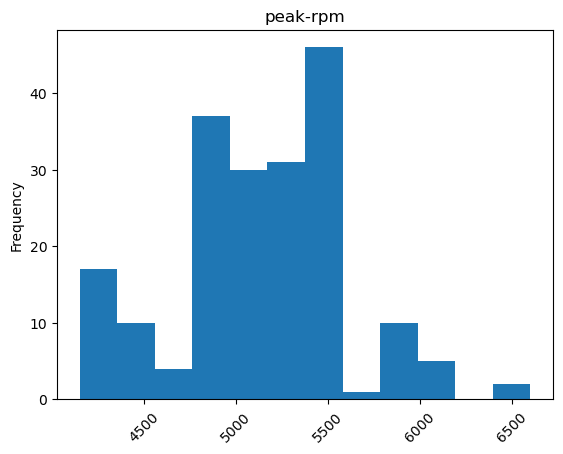

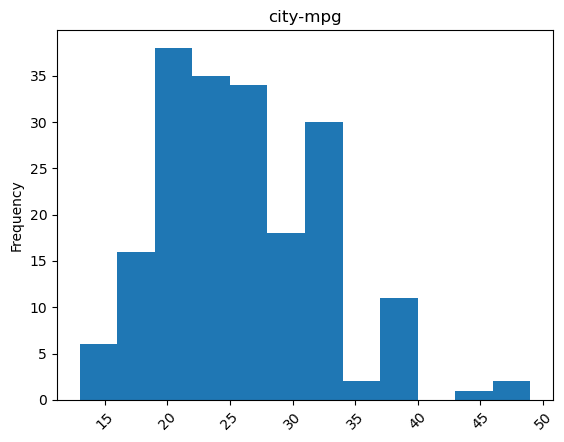

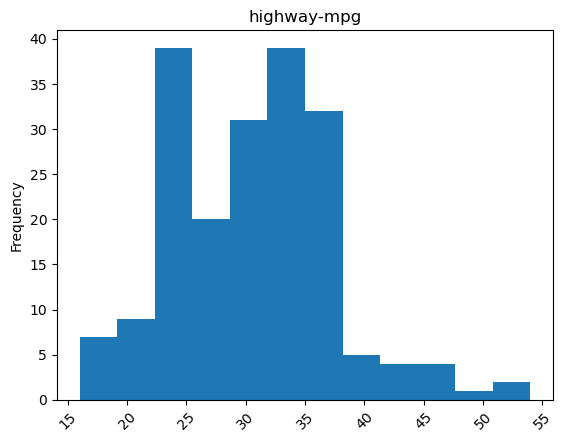

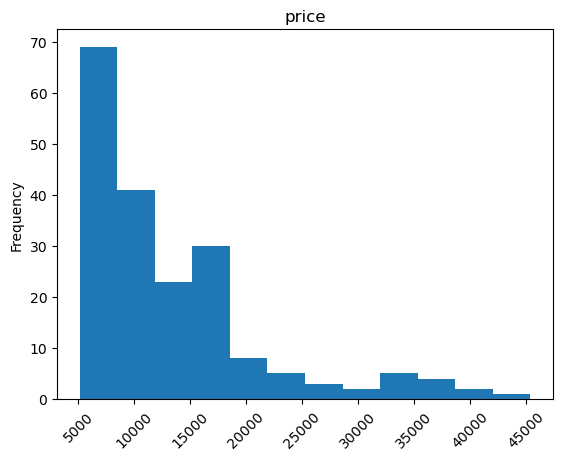

In [104]:
print('數值資料以直方圖顯示')
import matplotlib.pyplot as plt
for cols in clos5:
  auto_price[cols].plot(
      kind='hist',bins=12,title=cols,rot=45
  )
  plt.show( )

In [105]:
auto_price[clos5].corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
wheel-base,-0.536516,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007
compression-ratio,-0.175160,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483


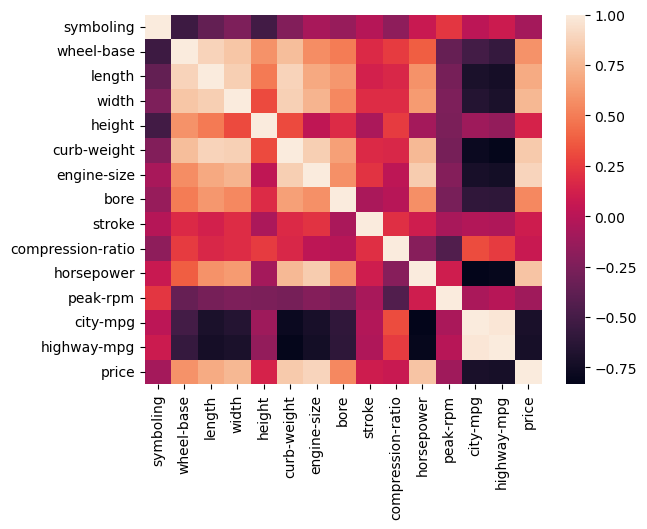

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(auto_price[clos5].corr())
plt.show()